# Analysis on Students Performance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import scipy.stats as stats
from scipy.stats import kurtosis, skew

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Changing column name to be space-less

In [4]:
df = df.rename(columns={'parental level of education':'parental_level_of_education', 'math score':'math_score', 'reading score':'reading_score', 'writing score':'writing_score'})
df

,gender,race/ethnicity,parental_level_of_education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Statistical Summary

In [42]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Math score means for every parental level of education

### Students with "master's degeree" parental level of education got highest in math score means

In [41]:
ple_means = df.groupby(df.parental_level_of_education)['math_score'].mean()
ple_means

parental_level_of_education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math_score, dtype: float64

## Data Variance

In [35]:
pvar = stat.pvariance(df.math_score)
var = stat.variance(df.math_score)
print('Population Variance is %.5f ' %pvar)
print('Sample Variance is %.5f ' %var)

Population Variance is 229.68908 
Sample Variance is 229.91900 


## Distribution plot of math_scores data

### left skewness or negative skewness

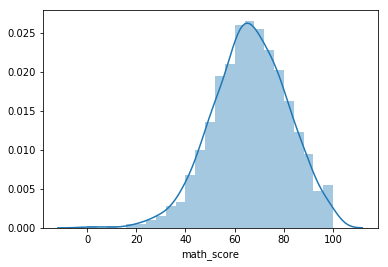

In [37]:
sns.distplot(df.math_score)

## Boxplot of math_scores data

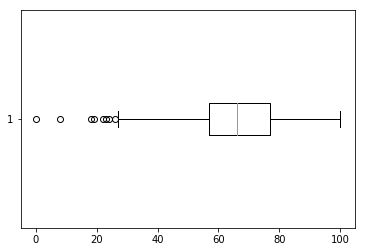

In [44]:
plt.boxplot(df.math_score, vert=False)
plt.show()

## Kurtosis and Skewness

### Skewness absolute value is under 0.5 so the distribution is pretty symetrical
### Kurtosis Value is positive so it means it has pointy peak. it is close to 0 which is normal distribution

In [43]:
print( 'excess kurtosis of normal distribution (should be 0): %.9f' %(kurtosis(df.math_score)))
print( 'skewness of normal distribution (should be 0): %.9f' %(skew(df.math_score)))

excess kurtosis of normal distribution (should be 0): 0.267597155
skewness of normal distribution (should be 0): -0.278516572


## Linear Regression Test

## On math and reading score

In [55]:
x = df.reading_score
y = df.math_score

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
garis_miring = slope * x + intercept

print("kontstanta: %.2f, gradien: %.5f" %(intercept, slope))
print('rvalue is: %.2f' %r_value)
print('std error is: %.3f' %std_err)

kontstanta: 7.36, gradien: 0.84910
rvalue is: 0.82
std error is: 0.019


## Scatter Plot

### There are relation between math score and reading score because R Value is 0.82

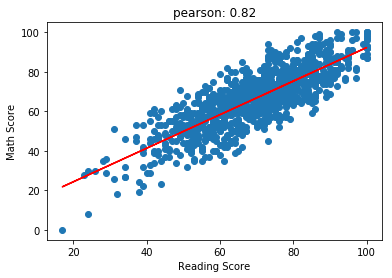

In [58]:
plt.scatter(x,y)
plt.plot(x,garis_miring,color='red')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.title("pearson: %.2f" %(r_value))
plt.show()

## On math and writing score

In [8]:
x = df.writing_score
y = df.math_score

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
garis_miring = slope * x + intercept

print("kontstanta: %.2f, gradien: %.5f" %(intercept, slope))
print('rvalue is: %.2f' %r_value)
print('std error is: %.3f' %std_err)

kontstanta: 11.58, gradien: 0.80092
rvalue is: 0.80
std error is: 0.019


## Scatter Plot

### There are relation between math score and writing score because R Value is 0.80

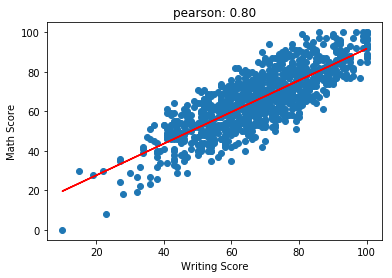

In [9]:
plt.scatter(x,y)
plt.plot(x,garis_miring,color='red')
plt.xlabel('Writing Score')
plt.ylabel('Math Score')
plt.title("pearson: %.2f" %(r_value))
plt.show()

## Crosstab Analysis

### Kids with 'some collage' parental level of education are the most to a get perfect score of 100 in math test with 3 students

In [26]:
ct = pd.crosstab(df.parental_level_of_education, df.math_score, margins=True, margins_name='Total')
ct

math_score,0,8,18,19,22,23,24,26,27,28,...,92,93,94,95,96,97,98,99,100,Total
parental_level_of_education,,,,,,,,,,,,,,,,,,,,,
associate's degree,0,0,0,0,0,0,0,1,0,0,...,1,1,2,1,1,3,1,0,2,222
bachelor's degree,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,2,1,0,1,2,118
high school,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,196
master's degree,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,59
some college,0,0,0,1,1,0,0,0,0,1,...,0,2,0,0,0,1,2,1,3,226
some high school,1,0,1,0,0,0,1,0,1,0,...,2,0,2,0,0,1,0,0,0,179
Total,1,1,1,1,1,1,1,1,2,1,...,6,4,7,2,3,6,3,3,7,1000


### 42% of student who got perfect score of 100, are kids with 'some collage' parental level of education

In [34]:
ct = pd.crosstab(df.parental_level_of_education, df.math_score, normalize='columns').round(3)
ct.to_csv('percentage.csv', index=True)
ct

math_score,0,8,18,19,22,23,24,26,27,28,...,91,92,93,94,95,96,97,98,99,100
parental_level_of_education,,,,,,,,,,,,,,,,,,,,,
associate's degree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.444,0.167,0.25,0.286,0.5,0.333,0.500,0.333,0.000,0.286
bachelor's degree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.222,0.333,0.25,0.143,0.0,0.667,0.167,0.000,0.333,0.286
high school,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,...,0.000,0.000,0.00,0.143,0.0,0.000,0.000,0.000,0.333,0.000
master's degree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.111,0.167,0.00,0.143,0.5,0.000,0.000,0.000,0.000,0.000
some college,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.222,0.000,0.50,0.000,0.0,0.000,0.167,0.667,0.333,0.429
some high school,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,...,0.000,0.333,0.00,0.286,0.0,0.000,0.167,0.000,0.000,0.000
